## Section 4 of Portfolio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/rym_clean1.csv')
df.drop(['Unnamed: 0','release_type'], inplace = True, axis=1)
df = df.set_index('position')
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['day'] = df['release_date'].dt.day
df['dayofweek'] = df['release_date'].dt.strftime('%A')
# df.head(10)

In [3]:
df[df['day'] ==1]

,release_name,artist_name,release_date,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,year,month,day,dayofweek
position,,,,,,,,,,,,,
14,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,1967-06-01,"Psychedelic Pop, Pop Rock","Art Rock, Psychedelic Rock, Baroque Pop, Sunsh...","psychedelic, playful, melodic, malevocals, opt...",4.13,45720,887,1967,6,1,Thursday
59,Souvlaki,Slowdive,1993-06-01,"Dream Pop, Shoegaze","Space Rock Revival, Neo-Psychedelia","melancholic, ethereal, mellow, romantic, atmos...",4.10,30706,310,1993,6,1,Tuesday
61,ye,Kanye West,2018-06-01,Pop Rap,"Contemporary R&B, Neo-Soul, Art Pop, Experimen...","introspective, malevocals, love, sampling, exi...",3.29,30340,269,2018,6,1,Friday
88,A Love Supreme,John Coltrane,1965-02-01,Spiritual Jazz,"Modal Jazz, Post-Bop","improvisation, passionate, spiritual, instrume...",4.30,26404,441,1965,2,1,Monday
118,The Velvet Underground,The Velvet Underground,1969-03-01,Pop Rock,"Folk Rock, Art Rock, Folk Pop","mellow, melancholic, bittersweet, melodic, int...",4.09,23154,406,1969,3,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Gothic,Paradise Lost,1991-04-01,Death Doom Metal,Gothic Metal,"malevocals, dark, angry, heavy, sombre, melanc...",3.65,2176,25,1991,4,1,Monday
4986,"Retired From Sad, New Career in Business",Mitski,2013-08-01,"Chamber Pop, Singer-Songwriter, Art Pop",Progressive Pop,"femalevocals, passionate, introspective, lonel...",3.47,2176,10,2013,8,1,Thursday
4991,Tigers Jaw,Tigers Jaw,2008-01-01,"Emo, Indie Rock","Pop Punk, Emo-Pop","energetic, breakup, passionate, malevocals, an...",3.54,2174,14,2008,1,1,Tuesday


<Axes: xlabel='year', ylabel='Count'>

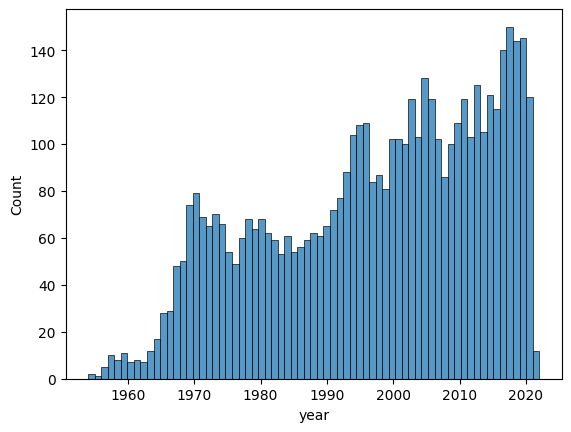

In [4]:
sns.histplot(df, x='year', bins=len(df['year'].unique()))

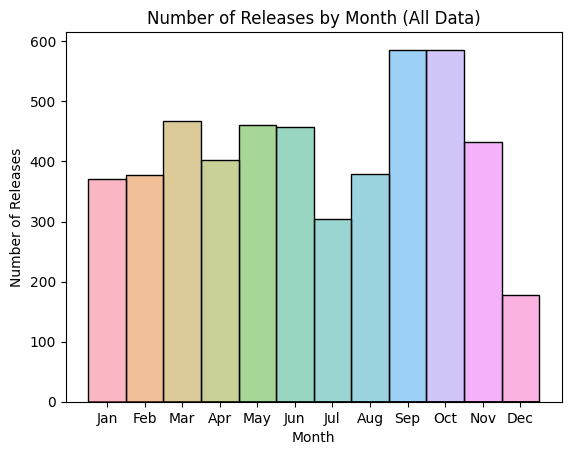

In [12]:
df['month_string'] = df.release_date.dt.strftime('%b')
df
groupd = df.groupby('month_string')[['month','year']].count()
groupd
groupd.rename({'month':'Number of Releases', 'month_string':'Month'}, axis = 1, inplace = True)
groupd.reset_index(inplace=True)
groupd

month_o = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}

groupd['order'] = groupd.month_string.map(month_o)
groupd.sort_values('order', inplace=True)

groupd
sns.histplot(groupd, x='month_string', bins = len(df['month_string'].unique()), hue='month_string', weights = 'Number of Releases',  legend=False)
plt.ylabel('Number of Releases')
plt.xlabel('Month')
plt.title('Number of Releases by Month (All Data)')
plt.savefig('plots/time/month_tot')

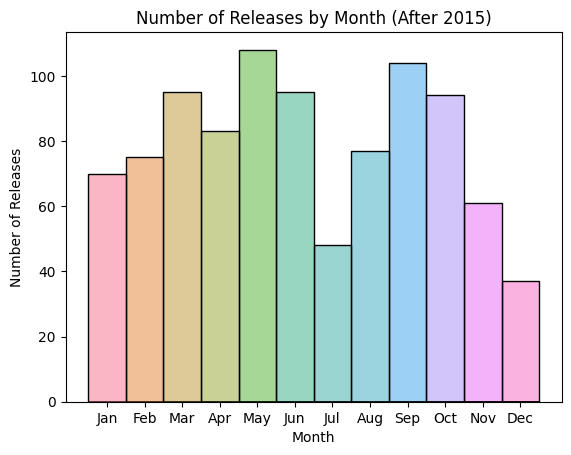

In [13]:
df['month_string'] = df.release_date.dt.strftime('%b')
df
groupd = df[df['year'] >= 2015].groupby('month_string')[['month','year']].count()
groupd
groupd.rename({'month':'Number of Releases', 'month_string':'Month'}, axis = 1, inplace = True)
groupd.reset_index(inplace=True)
groupd

month_o = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}

groupd['order'] = groupd.month_string.map(month_o)
groupd.sort_values('order', inplace=True)

groupd
sns.histplot(groupd, x='month_string', bins = len(df['month_string'].unique()), hue='month_string', weights = 'Number of Releases',  legend=False)
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Month (After 2015)')
plt.xlabel('Month')
plt.savefig('plots/time/month_new')

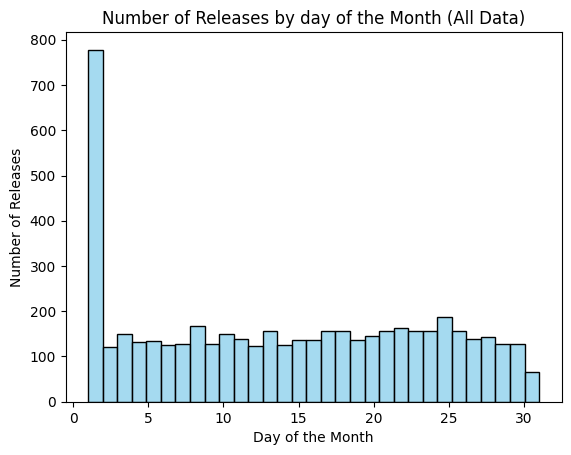

In [7]:
groupd = df.groupby('day')[['day', 'month']].count()
groupd.rename({'day':'Number of Releases'},axis=1, inplace=True)
groupd.reset_index()
sns.histplot(groupd, x='day', bins = len(df['day'].unique()), weights = 'Number of Releases', color='skyblue',legend=False)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by day of the Month (All Data)')
plt.savefig('plots/time/daym_tot')

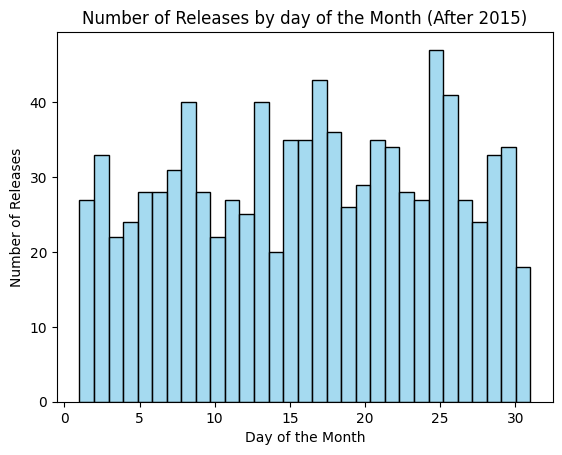

In [8]:
groupd = df[df['year'] >= 2015].groupby('day')[['day', 'month']].count()
groupd.rename({'day':'Number of Releases'},axis=1, inplace=True)
groupd.reset_index()
sns.histplot(groupd, x='day', bins = len(df['day'].unique()), weights = 'Number of Releases', color='skyblue',legend=False)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by day of the Month (After 2015)')
plt.savefig('plots/time/daym_new')

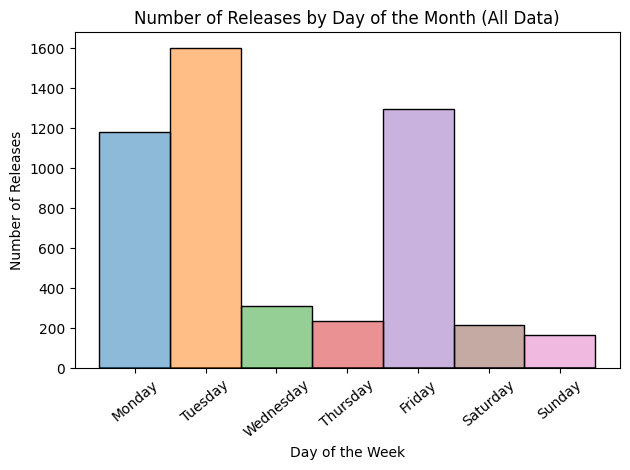

In [14]:
day_order = {'Monday':0, 'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
    

days_df= df.groupby('dayofweek')[['year', 'dayofweek']].count()
days_df.rename({'dayofweek':'count'},axis=1, inplace=True)
days_df.reset_index(inplace = True)

day_i = days_df.dayofweek.map(day_order).sort_values()

sns.histplot(days_df.iloc[day_i.index], x='dayofweek',weights='count',hue='dayofweek', legend=False)
plt.xticks(rotation=40)
plt.tight_layout()
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Day of the Month (All Data)')
plt.tight_layout()
plt.savefig('plots/time/day_tot')

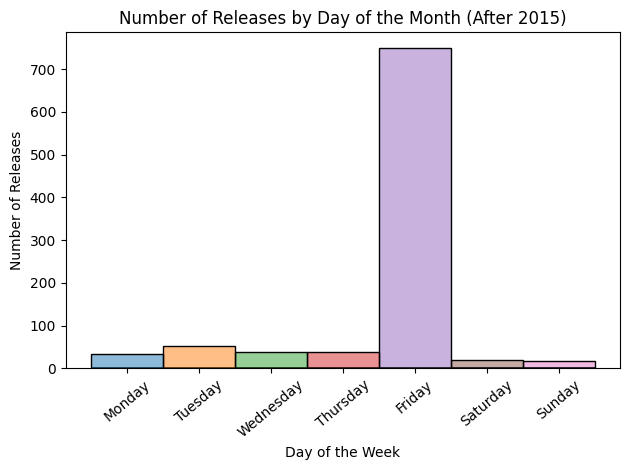

In [15]:
days_df= df[df['year'] >= 2015].groupby('dayofweek')[['year', 'dayofweek']].count()
days_df.rename({'dayofweek':'count'},axis=1, inplace=True)
days_df.reset_index(inplace = True)

day_i = days_df.dayofweek.map(day_order).sort_values()

sns.histplot(days_df.iloc[day_i.index], x='dayofweek',weights='count',hue='dayofweek', legend=False)
plt.xticks(rotation=40)
plt.tight_layout()
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Day of the Month (After 2015)')
plt.tight_layout()
plt.savefig('plots/time/day_new')

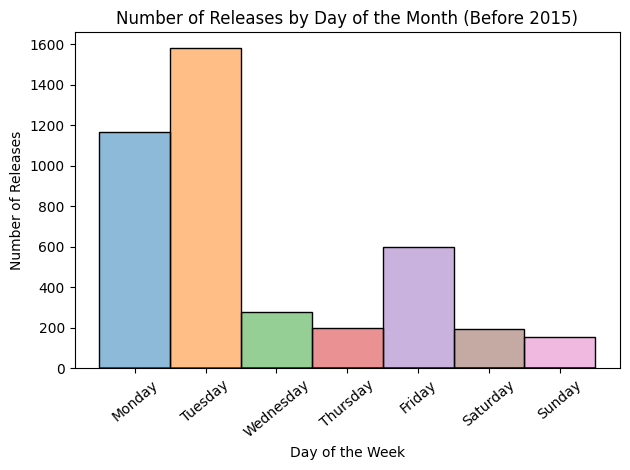

In [16]:
days_df= df[df['year'] <= 2015].groupby('dayofweek')[['year', 'dayofweek']].count()
days_df.rename({'dayofweek':'count'},axis=1, inplace=True)
days_df.reset_index(inplace = True)

day_i = days_df.dayofweek.map(day_order).sort_values()

sns.histplot(days_df.iloc[day_i.index], x='dayofweek',weights='count',hue='dayofweek', legend=False)
plt.xticks(rotation=40)
plt.tight_layout()
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Number of Releases by Day of the Month (Before 2015)')
plt.tight_layout()
plt.savefig('plots/time/day_old')